In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.6-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.6-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


W0905 16:04:09.149654 139983226124160 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Setting up the directory working folder
!mkdir drive
!google-drive-ocamlfuse drive
!ls 'drive/Colab Notebooks'

 data
'Generating_trending_outfits_using_GANs (9e700c24).ipynb'
 Generating_trending_outfits_using_GANs.ipynb
 image_samples
 multi_label_classification
 multi_label_classification_attribute
 result
 results.csv
 results_custom.csv
 tflib
'Transfer GANs.ipynb'
 transfer_model
 Untitled0.ipynb


In [0]:
import os
os.chdir('drive/Colab Notebooks')
os.getcwd()

'/content/drive/Colab Notebooks'

In [0]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import MaxPooling2D, Conv2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [0]:
df = pd.read_csv('multi_label_classification/labels.csv')

columns = ['Blue', 'Black', 'Red', 'White', 'Yellow', 'Green', 'Designer', 'Kurta', 'Saree', 'Men', 'Women']

datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator = datagen.flow_from_dataframe(
    dataframe=df[:1800],
    directory="multi_label_classification/images",
    x_col="File",
    y_col=columns,
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="other",
    target_size=(256,256))

valid_generator=test_datagen.flow_from_dataframe(
    dataframe=df[1800:1900],
    directory="multi_label_classification/images",
    x_col="File",
    y_col=columns,
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="other",
    target_size=(256,256))

test_generator = datagen.flow_from_dataframe(
    dataframe=df[1900:],
    directory="multi_label_classification/images",
    x_col="File",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(256,256))

Found 1800 validated image filenames.
Found 100 validated image filenames.
Found 166 validated image filenames.


**Preparing Our Custom Model**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='sigmoid'))

W0904 15:26:57.824788 139759681369984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 15:26:57.827947 139759681369984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 15:26:57.833178 139759681369984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 15:26:57.888971 139759681369984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0904 15:26:57.891765 139759681369984 deprecation_wrapp

In [0]:
from keras.optimizers import adam
# Set Optimizer
opt = adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

W0904 15:26:59.667610 139759681369984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 15:26:59.674744 139759681369984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0904 15:26:59.680372 139759681369984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

# For creating model checkpoint
from keras.callbacks import ModelCheckpoint
filepath = 'multi_label_classification/checkpoint/'
checkpoint = ModelCheckpoint(filepath, monitor=['val_acc'], verbose=1, mode='max')
callbacks = [checkpoint]

In [0]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)


Epoch 1/10
56/56 [==============================] - 1077s 19s/step - loss: 0.5340 - acc: 0.7998 - val_loss: 0.2960 - val_acc: 0.8722
Epoch 2/10
56/56 [==============================] - 611s 11s/step - loss: 0.2277 - acc: 0.9053 - val_loss: 0.2245 - val_acc: 0.8997
Epoch 3/10
56/56 [==============================] - 623s 11s/step - loss: 0.1459 - acc: 0.9408 - val_loss: 0.1024 - val_acc: 0.9612
Epoch 4/10
56/56 [==============================] - 636s 11s/step - loss: 0.1044 - acc: 0.9617 - val_loss: 0.0974 - val_acc: 0.9679
Epoch 5/10
56/56 [==============================] - 636s 11s/step - loss: 0.0798 - acc: 0.9699 - val_loss: 0.1527 - val_acc: 0.9413
Epoch 6/10
56/56 [==============================] - 615s 11s/step - loss: 0.0615 - acc: 0.9783 - val_loss: 0.1953 - val_acc: 0.9372
Epoch 7/10
56/56 [==============================] - 614s 11s/step - loss: 0.0541 - acc: 0.9803 - val_loss: 0.0814 - val_acc: 0.9599
Epoch 8/10
56/56 [==============================] - 654s 12s/step - loss: 0

In [0]:
import matplotlib.pyplot as plt

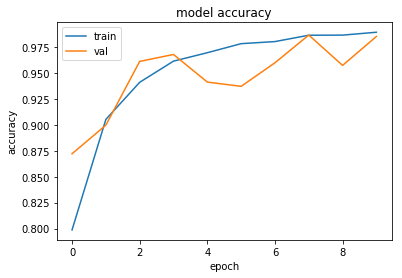

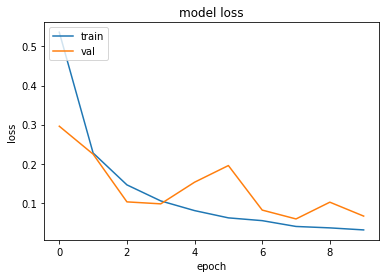

<Figure size 432x288 with 0 Axes>

In [0]:

# Plot the training and validation loss + accuracy
def plot_training(history):
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.savefig('multi_label_classification/acc_vs_epochs.png')

plot_training(history)

In [0]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred > 0.5)
predictions = pred_bool.astype(int)
columns=['Blue', 'Black', 'Red', 'White', 'Yellow', 'Green', 'Designer', 'Kurta', 'Saree', 'Men', 'Women']
#columns should be the same order of y_col

results=pd.DataFrame(predictions, columns=columns)
results["File"]=test_generator.filenames
ordered_cols=["File"]+columns
results=results[ordered_cols]#To get the same column order

results.to_csv("results_custom.csv",index=False)

166/166 [==============================] - 99s 594ms/step


**Preparing our pretrained model**

In [0]:
from keras.optimizers import adam, rmsprop
# For creating model checkpoint
from keras.callbacks import ModelCheckpoint


In [0]:
def model(base_model):
  class_list = ['Blue', 'Black', 'Red', 'White', 'Yellow', 'Green', 'Designer', 'Kurta', 'Saree', 'Men', 'Women']
  
  def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
      layer.trainable = False
    
    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
      x = Dense(fc, activation='relu')(x)
      x = Dropout(dropout)(x)
      
    # new softmax layer
    predictions = Dense(num_classes, activation='sigmoid')(x)
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)
    return finetune_model
  
  FC_LAYERS = [1024,1024]
  dropout = 0.5
  finetune_model = build_finetune_model(base_model, dropout=dropout,fc_layers=FC_LAYERS,num_classes=len(class_list))
  # Set Optimizer
  opt = .rmsprop(lr=0.0001, decay=1e-6)

  # Compile model
  finetune_model.compile(
      loss='binary_crossentropy',
      optimizer=opt,
      metrics=['accuracy']
  )
  filepath = 'multi_label_classification/checkpoint/'
  checkpoint = ModelCheckpoint(filepath, monitor=['val_acc'], verbose=1, mode='max')
  callbacks = [checkpoint]
  
  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
  STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

  history = finetune_model.fit_generator(generator=train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      epochs=10
  )
  # Plot the training and validation loss + accuracy
  def plot_training(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.savefig('multi_label_classification/acc_vs_epochs.png')

  plot_training(history)


 

In [0]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Sequential, Model

In [0]:
# Pretrained Model
resnet50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
model(resnet50_model)

In [0]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred > 0.5)
predictions = pred_bool.astype(int)
columns=['Blue', 'Black', 'Red', 'White', 'Yellow', 'Green', 'Designer', 'Kurta', 'Saree', 'Men', 'Women']
#columns should be the same order of y_col

results=pd.DataFrame(predictions, columns=columns)
results["File"]=test_generator.filenames
ordered_cols=["File"]+columns
results=results[ordered_cols]#To get the same column order

results.to_csv("results_pretrained_resnet.csv",index=False)

In [0]:
vgg16_model = VGG16(weights='imagenet', 
                      include_top=False, 
                      input_shape=(256,256,3))
model(vgg16_model)

In [0]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred > 0.5)
predictions = pred_bool.astype(int)
columns=['Blue', 'Black', 'Red', 'White', 'Yellow', 'Green', 'Designer', 'Kurta', 'Saree', 'Men', 'Women']
#columns should be the same order of y_col

results=pd.DataFrame(predictions, columns=columns)
results["File"]=test_generator.filenames
ordered_cols=["File"]+columns
results=results[ordered_cols]#To get the same column order

results.to_csv("results_pretrained_vgg.csv",index=False)

In [0]:
inception_model = InceptionV3(weights='imagenet', 
                      include_top=False, 
                      input_shape=(256, 256, 3))
model(inception_model)

In [0]:
test_generator.reset()

pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

pred_bool = (pred > 0.5)
predictions = pred_bool.astype(int)
columns=['Blue', 'Black', 'Red', 'White', 'Yellow', 'Green', 'Designer', 'Kurta', 'Saree', 'Men', 'Women']
#columns should be the same order of y_col

results=pd.DataFrame(predictions, columns=columns)
results["File"]=test_generator.filenames
ordered_cols=["File"]+columns
results=results[ordered_cols]#To get the same column order

results.to_csv("results_pretrained_inception.csv",index=False)